# Connect to Filght Database
-  data source: provided by jsonstudio.com

In [1]:
from pymongo import MongoClient
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

In [2]:
client = MongoClient('mongodb://localhost:27017/')
print(client.database_names())

['admin', 'config', 'exhibits', 'flight', 'inventory', 'local', 'orders', 'products', 'sales', 'test-database-1', 'users']


In [3]:
db = client['flight']
db.collection_names()
coll = db['flights']

In [4]:
coll.count()
coll.find_one()

{'_id': ObjectId('534205f61c479f6149a92709'),
 'YEAR': 2013,
 'QUARTER': 1,
 'MONTH': 1,
 'DAY_OF_MONTH': 18,
 'DAY_OF_WEEK': 5,
 'FL_DATE': '2013-01-18',
 'UNIQUE_CARRIER': 'DL',
 'AIRLINE_ID': 19790,
 'CARRIER': 'DL',
 'TAIL_NUM': 'N325US',
 'FL_NUM': 1497,
 'ORIGIN_AIRPORT_ID': 14100,
 'ORIGIN_AIRPORT_SEQ_ID': 1410002,
 'ORIGIN_CITY_MARKET_ID': 34100,
 'ORIGIN': 'PHL',
 'ORIGIN_CITY_NAME': 'Philadelphia, PA',
 'ORIGIN_STATE_ABR': 'PA',
 'ORIGIN_STATE_FIPS': 42,
 'DEST_AIRPORT_ID': 13487,
 'DEST_AIRPORT_SEQ_ID': 1348702,
 'DEST_CITY_MARKET_ID': 31650,
 'DEST': 'MSP',
 'DEST_CITY_NAME': 'Minneapolis, MN',
 'DEST_STATE_ABR': 'MN',
 'DEST_STATE_FIPS': 27,
 'DEST_STATE_NM': 'Minnesota',
 'DEST_WAC': 63,
 'CRS_DEP_TIME': 805,
 'DEP_TIME': 758,
 'DEP_DELAY': -7,
 'DEP_DELAY_NEW': 0,
 'DEP_DEL15': 0,
 'DEP_DELAY_GROUP': -1,
 'DEP_TIME_BLK': '0800-0859',
 'TAXI_OUT': 24,
 'WHEELS_OFF': 822,
 'WHEELS_ON': 958,
 'TAXI_IN': 4,
 'CRS_ARR_TIME': 1015,
 'ARR_TIME': 1002,
 'ARR_DELAY': -13,
 'ARR_D

# Analyze Filght Data
## Who are the Largest carries?
-  $group: https://docs.mongodb.com/manual/reference/operator/aggregation-pipeline/

-  $sort: https://docs.mongodb.com/manual/reference/operator/aggregation/sort/

-  pie chart: https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

In [10]:
res = coll.aggregate([
    { 
        '$group': { 
            '_id': {'CARRIER': "$CARRIER"}, 
            'count': {'$sum': 1}
        }
    },
    { 
        '$sort': {'count': -1}
    }
])

In [6]:
print(*res,sep='\n')

{'_id': {'CARRIER': 'WN'}, 'count': 89169}
{'_id': {'CARRIER': 'EV'}, 'count': 57934}
{'_id': {'CARRIER': 'DL'}, 'count': 57182}
{'_id': {'CARRIER': 'OO'}, 'count': 51762}
{'_id': {'CARRIER': 'AA'}, 'count': 44848}
{'_id': {'CARRIER': 'UA'}, 'count': 40419}
{'_id': {'CARRIER': 'MQ'}, 'count': 37693}
{'_id': {'CARRIER': 'US'}, 'count': 33567}
{'_id': {'CARRIER': '9E'}, 'count': 23658}
{'_id': {'CARRIER': 'B6'}, 'count': 19291}
{'_id': {'CARRIER': 'FL'}, 'count': 15313}
{'_id': {'CARRIER': 'AS'}, 'count': 12020}
{'_id': {'CARRIER': 'YV'}, 'count': 10647}
{'_id': {'CARRIER': 'HA'}, 'count': 5982}
{'_id': {'CARRIER': 'F9'}, 'count': 5804}
{'_id': {'CARRIER': 'VX'}, 'count': 4230}


In [11]:
largest_carrier = list(res)

In [12]:
largest_carrier

[{'_id': {'CARRIER': 'WN'}, 'count': 89169},
 {'_id': {'CARRIER': 'EV'}, 'count': 57934},
 {'_id': {'CARRIER': 'DL'}, 'count': 57182},
 {'_id': {'CARRIER': 'OO'}, 'count': 51762},
 {'_id': {'CARRIER': 'AA'}, 'count': 44848},
 {'_id': {'CARRIER': 'UA'}, 'count': 40419},
 {'_id': {'CARRIER': 'MQ'}, 'count': 37693},
 {'_id': {'CARRIER': 'US'}, 'count': 33567},
 {'_id': {'CARRIER': '9E'}, 'count': 23658},
 {'_id': {'CARRIER': 'B6'}, 'count': 19291},
 {'_id': {'CARRIER': 'FL'}, 'count': 15313},
 {'_id': {'CARRIER': 'AS'}, 'count': 12020},
 {'_id': {'CARRIER': 'YV'}, 'count': 10647},
 {'_id': {'CARRIER': 'HA'}, 'count': 5982},
 {'_id': {'CARRIER': 'F9'}, 'count': 5804},
 {'_id': {'CARRIER': 'VX'}, 'count': 4230}]

In [13]:
carrier = []
for i in range(len(largest_carrier)):
    carrier.append(largest_carrier[i]['_id']['CARRIER'])
count = []
for i in range(len(largest_carrier)):
    count.append(largest_carrier[i]['count'])

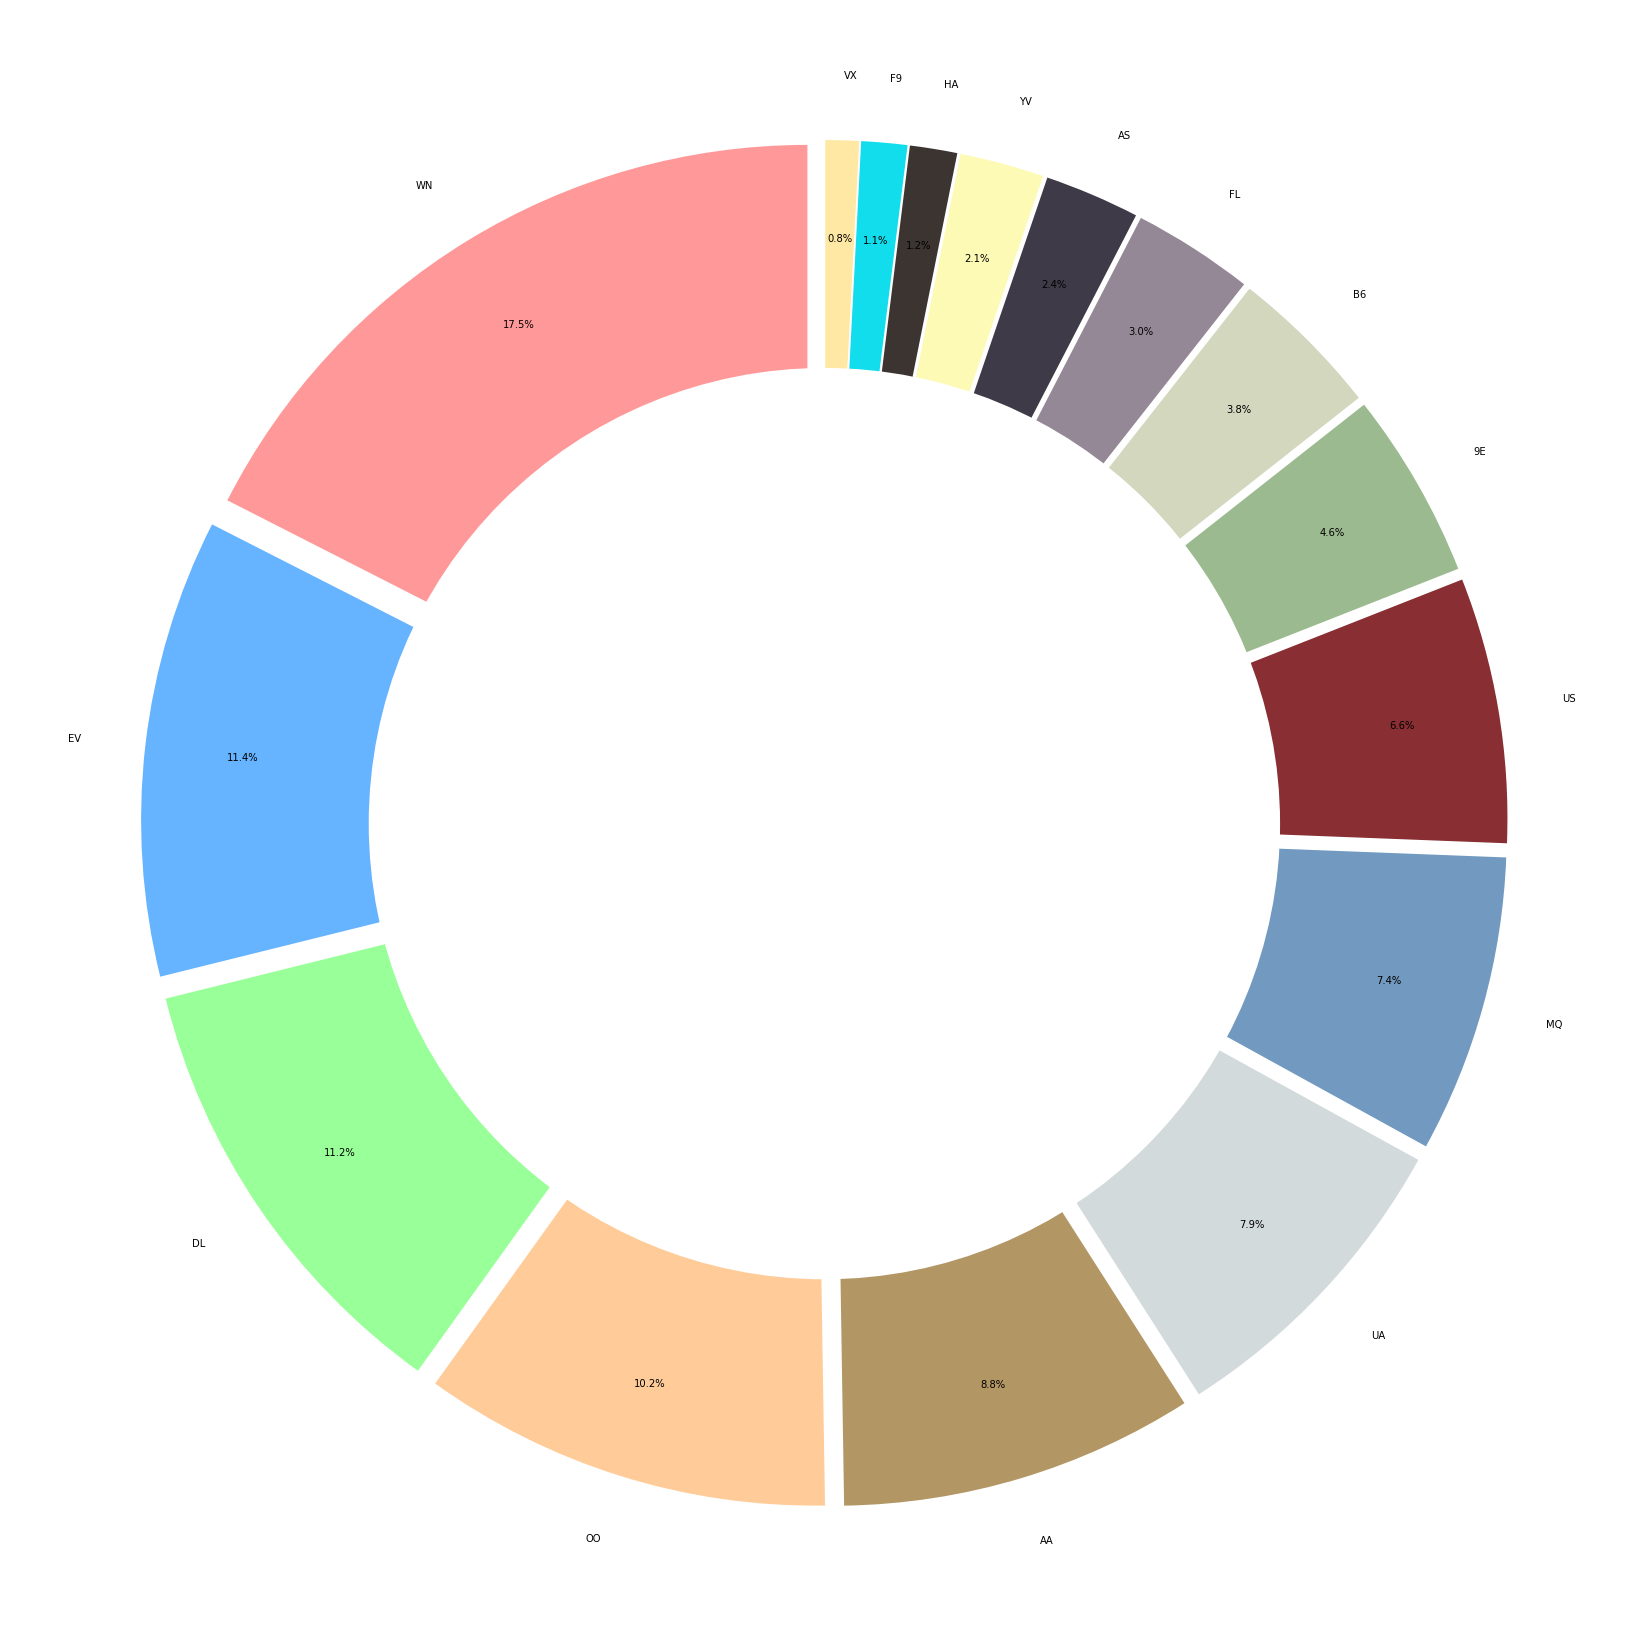

In [14]:
plt.figure(figsize=(23,23))
import matplotlib.pyplot as plt
# Pie chart
labels = carrier
sizes = count
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#b29664','#d3dadb','#7299bf','#892e32',
         '#9cba8f','#d2d7be','#948796','#3e3a47','#fdfab6','#3c3431','#11dded','#fee8a3']
#explsion
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle  
plt.tight_layout()
plt.show()

### Which Airports Have the Most Cancella*ons?
-  $match: https://docs.mongodb.com/manual/reference/operator/aggregation/match/

In [15]:
res = coll.aggregate([
    {
        '$match': {"CANCELLED": 1}
    },
    {
        '$group': {
            '_id': {'ORIGIN':'$ORIGIN'},
            'count': {'$sum': 1}
        }
    },
    {
        '$sort': {'count': -1}
    }
])

In [16]:
airport_cancelled = list(res)

In [17]:
len(airport_cancelled)

287

In [18]:
# print(*airport_cancelled, sep = '\n')

### Which Carriers Are Most at Fault for Cancella*ons?

In [19]:
res = coll.aggregate([
    {
        '$match': {
            'CANCELLED': 1,
            'CANCELLATION_CODE': 'A'
        }
    },
    {
        '$group': {
            '_id': {'ORIGIN':'$ORIGIN'},
            'count': {'$sum': 1}
        }
    },
    {
        '$sort': {'count': -1}
    }
])

In [20]:
airport_cancelled_at_fault = list(res)

In [21]:
len(airport_cancelled)

287

In [22]:
# print(*airport_cancelled_at_fault, sep = '\n')

### Arrival Delays by Distance

In [24]:
res = coll.aggregate([
    {
        '$group': {
            '_id': {'DISTANCE_GROUP': '$DISTANCE_GROUP'},
            'count': {'$sum': 1},
            'avg_DEP_DELAY':{'$avg': '$DEP_DELAY'},
            'avg_ARR_DELAY':{'$avg': '$ARR_DELAY'}     
        }
    }
])

In [25]:
distance_group = list(res)

In [26]:
#for group in distance_group:
 #   pprint(group)

In [27]:
distance_group[0]

{'_id': {'DISTANCE_GROUP': 10},
 'count': 10924,
 'avg_DEP_DELAY': 6.076979606834466,
 'avg_ARR_DELAY': -2.314375403933155}

In [28]:
group = []
for i in range(len(distance_group)):
    group.append(distance_group[i]['_id']['DISTANCE_GROUP'])

avg_DEP_DELAY = []
for i in range(len(distance_group)):
    avg_DEP_DELAY.append(distance_group[i]['avg_DEP_DELAY'])

In [29]:
columns = ['group','average dep delay']
df = pd.DataFrame(columns=columns)
df['group'] = group
df['average dep delay'] = avg_DEP_DELAY

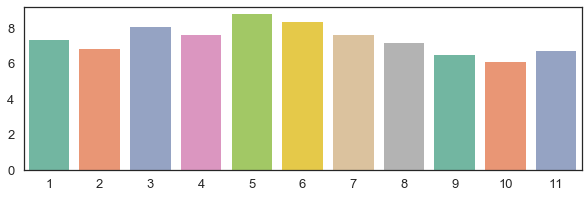

In [31]:
import seaborn as sns
sns.set()
plt.figure(figsize=(10,3))
sns.set(style="white", context="talk")
fig = sns.barplot(group, avg_DEP_DELAY, palette="Set2")

(0, 11.703804595641227)

<Figure size 720x216 with 0 Axes>

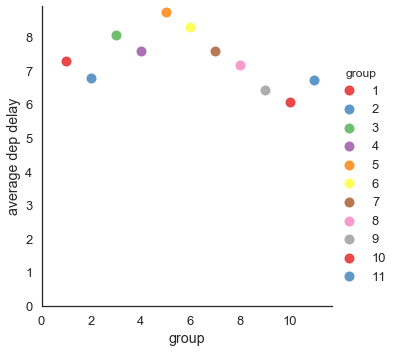

In [32]:
#### Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns
plt.figure(figsize=(10,3))
# Plot using Seaborn
sns.lmplot(x='group', y='average dep delay', data=df,
           fit_reg=False, 
           palette="Set1",
           scatter_kws={"s": 100},
           hue = 'group'
          )

# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

### Delays by Distance by Carrier?

In [33]:
res = coll.aggregate([
    {
        '$group': {
            '_id': {
                'DISTANCE_GROUP': '$DISTANCE_GROUP',
                'CARRIER': '$CARRIER'
            },
            'count': {'$sum': 1},
            'avg_DEP_DELAY':{'$avg': '$DEP_DELAY'},
            'avg_ARR_DELAY':{'$avg': '$ARR_DELAY'}     
        }
    }
])

In [34]:
distance_group_carrier = list(res)

In [35]:
distance_group_carrier[0]

{'_id': {'DISTANCE_GROUP': 9, 'CARRIER': 'B6'},
 'count': 256,
 'avg_DEP_DELAY': 10.46875,
 'avg_ARR_DELAY': 2.3333333333333335}

### Delays by Distance by Carrier – Long Haul Only

In [36]:
res = coll.aggregate([
    {
        '$group': {
            '_id': {
                'DISTANCE_GROUP': '$DISTANCE_GROUP',
                'CARRIER': '$CARRIER'
            },
            'count': {'$sum': 1},
            'avg_DEP_DELAY':{'$avg': '$DEP_DELAY'},
            'avg_ARR_DELAY':{'$avg': '$ARR_DELAY'}     
        }
    },
    {
        '$match': {'_id.DISTANCE_GROUP': {'$gte': 8}}
    }
])

In [37]:
distance_group_carrier_long_haul = list(res)

In [38]:
distance_group_carrier_long_haul[0]

{'_id': {'DISTANCE_GROUP': 9, 'CARRIER': 'B6'},
 'count': 256,
 'avg_DEP_DELAY': 10.46875,
 'avg_ARR_DELAY': 2.3333333333333335}

### Orders does Matter!

In [39]:
res = coll.aggregate([
    {
        '$match': {'DISTANCE_GROUP': {'$gte': 8}}
    },
    {
        '$group': {
            '_id': {
                'DISTANCE_GROUP': '$DISTANCE_GROUP',
                'CARRIER': '$CARRIER'
            },
            'count': {'$sum': 1},
            'avg_DEP_DELAY':{'$avg': '$DEP_DELAY'},
            'avg_ARR_DELAY':{'$avg': '$ARR_DELAY'}     
        }
    }
])

In [41]:
distance_group_carrier_long_haul_order = list(res)

In [42]:
res = coll.aggregate([
    {
        '$match': {'DISTANCE_GROUP': {'$gte': 8}}
    }
])

In [43]:
list(res)[0]

{'_id': ObjectId('534205f61c479f6149a92713'),
 'YEAR': 2013,
 'QUARTER': 1,
 'MONTH': 1,
 'DAY_OF_MONTH': 18,
 'DAY_OF_WEEK': 5,
 'FL_DATE': '2013-01-18',
 'UNIQUE_CARRIER': 'DL',
 'AIRLINE_ID': 19790,
 'CARRIER': 'DL',
 'TAIL_NUM': 'N663DN',
 'FL_NUM': 1506,
 'ORIGIN_AIRPORT_ID': 12892,
 'ORIGIN_AIRPORT_SEQ_ID': 1289203,
 'ORIGIN_CITY_MARKET_ID': 32575,
 'ORIGIN': 'LAX',
 'ORIGIN_CITY_NAME': 'Los Angeles, CA',
 'ORIGIN_STATE_ABR': 'CA',
 'ORIGIN_STATE_FIPS': 6,
 'DEST_AIRPORT_ID': 11433,
 'DEST_AIRPORT_SEQ_ID': 1143302,
 'DEST_CITY_MARKET_ID': 31295,
 'DEST': 'DTW',
 'DEST_CITY_NAME': 'Detroit, MI',
 'DEST_STATE_ABR': 'MI',
 'DEST_STATE_FIPS': 26,
 'DEST_STATE_NM': 'Michigan',
 'DEST_WAC': 43,
 'CRS_DEP_TIME': 700,
 'DEP_TIME': 658,
 'DEP_DELAY': -2,
 'DEP_DELAY_NEW': 0,
 'DEP_DEL15': 0,
 'DEP_DELAY_GROUP': -1,
 'DEP_TIME_BLK': '0700-0759',
 'TAXI_OUT': 17,
 'WHEELS_OFF': 715,
 'WHEELS_ON': 1407,
 'TAXI_IN': 11,
 'CRS_ARR_TIME': 1427,
 'ARR_TIME': 1418,
 'ARR_DELAY': -9,
 'ARR_DELAY_N

### Hub Airport

In [44]:
res = coll.aggregate([
    {
        '$group': {
            '_id': {
                'ORIGIN': '$ORIGIN',
                'CARRIER':'$CARRIER'
            },
            'count': {'$sum': 1}
        }
    },
    {
        '$project': {
            'airport': '$_id.ORIGIN',
            'carrier': '$_id.CARRIER',
            'count':1
        }
    }
])

In [45]:
test = list(res)

In [46]:
test[0]

{'_id': {'ORIGIN': 'MOT', 'CARRIER': 'DL'},
 'count': 1,
 'airport': 'MOT',
 'carrier': 'DL'}

In [47]:
res = coll.aggregate([
    {
        '$group': {
            '_id': {
                'ORIGIN': '$ORIGIN',
                'CARRIER':'$CARRIER'
            },
            'count': {'$sum': 1}
        }
    },
    {
        '$project': {
            'airport': '$_id.ORIGIN',
            'carrier': '$_id.CARRIER',
            'count':1
        }
    },
    {
        '$group': {
            '_id': {'airport': '$airport'},
            'airlines': {'$sum': 1},
            'flight': {'$sum': '$count'},
            'avg_airline': {'$max': '$count'}
        }
    },
    {
        '$sort': {'flight': -1}
    }
])

In [48]:
test2 = list(res)

In [50]:
test2[0]

{'_id': {'airport': 'ATL'},
 'airlines': 13,
 'flight': 32362,
 'avg_airline': 16357}

In [51]:
res = coll.aggregate([
    {
        '$group': {
            '_id': {
                'ORIGIN': '$ORIGIN',
                'CARRIER': '$CARRIER'
            },
            'count': {'$sum': 1}
        }
    },
    {
        '$project': {
            'airport': '$_id.ORIGIN',
            'carrier': '$_id.CARRIER',
            'count': 1
        }
    },
    {
        '$match': {
            'count': {'$gte': 100} #$$hub_threshold
        }
    },
])

In [52]:
test3 = list(res)

In [53]:
test3[0]

{'_id': {'ORIGIN': 'LGB', 'CARRIER': 'B6'},
 'count': 721,
 'airport': 'LGB',
 'carrier': 'B6'}

In [54]:
res = coll.aggregate([
    {
        '$group': {
            '_id': {
                'ORIGIN': '$ORIGIN',
                'CARRIER': '$CARRIER'
            },
            'count': {'$sum': 1}
        }
    },
    {
        '$project': {
            'airport': '$_id.ORIGIN',
            'carrier': '$_id.CARRIER',
            'count': 1
        }
    },
    {
        '$match': {
            'count': {'$gte': 100} #$$hub_threshold
        }
    },
    {
        '$group': {
            '_id': {'airport': '$airport'},
            'airlines': {'$sum': 1},
            'flight': {'$sum': '$count'},
            'avg_airline': {'$avg': '$count'},
            'max_airline': {'$max': '$count'}
        }
    },
    {
        '$project': {
            'airlines': 1,
            'flight': 1,
            'avg_airline': 1,
            'max_airline': 1,
            'avg_no_max': {
                '$divide': [{'$subtract': ['$flight','$max_airline']},'$airlines']
            }
        }   
    },
    {
        '$sort': {'flight': -1}
    }
])

In [55]:
test4 = list(res)

In [56]:
test4[0]

{'_id': {'airport': 'ATL'},
 'airlines': 10,
 'flight': 32204,
 'avg_airline': 3220.4,
 'max_airline': 16357,
 'avg_no_max': 1584.7}

### Flight Route

In [57]:
res = coll.aggregate([
    {
       '$group': {
           '_id': {
               'UNIQUE_CARRIER': '$UNIQUE_CARRIER',
               'ORIGIN': '$ORIGIN',
               'DEST': '$DEST'
           },
           'count': {'$sum': 1}
       }
    },
    {
        '$match': {'count': {'$gt': 0}}
    },
    {
        '$sort': {'count': -1}
    }
])

In [58]:
route = list(res)

In [59]:
pprint(route[0:3])

[{'_id': {'DEST': 'HNL', 'ORIGIN': 'OGG', 'UNIQUE_CARRIER': 'HA'},
  'count': 790},
 {'_id': {'DEST': 'OGG', 'ORIGIN': 'HNL', 'UNIQUE_CARRIER': 'HA'},
  'count': 790},
 {'_id': {'DEST': 'LAX', 'ORIGIN': 'SAN', 'UNIQUE_CARRIER': 'OO'},
  'count': 777}]
